# Initialize

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D

url = "https://drive.google.com/file/d/1dWutkwjsqaZcggeFiaKfoJNdUgzICnjP/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]

path = "dengue.csv"

df = pd.read_csv(path)

In [2]:
data = df

data = data.drop(index=0)

data.head(10)

,loc,cases,deaths,date,Region
1,ALBAY,15,0,1/10/2016,REGION V-BICOL REGION
2,ALBAY,13,0,1/17/2016,REGION V-BICOL REGION
3,ALBAY,9,0,1/24/2016,REGION V-BICOL REGION
4,ALBAY,14,0,1/31/2016,REGION V-BICOL REGION
5,ALBAY,9,0,2/7/2016,REGION V-BICOL REGION
6,ALBAY,17,0,2/14/2016,REGION V-BICOL REGION
7,ALBAY,3,0,2/21/2016,REGION V-BICOL REGION
8,ALBAY,11,0,2/28/2016,REGION V-BICOL REGION
9,ALBAY,8,0,3/6/2016,REGION V-BICOL REGION
10,ALBAY,6,0,3/13/2016,REGION V-BICOL REGION


# Clean

In [3]:
# Remove Zero Values From The Data
data['deaths'] = data['deaths'].astype('Int64')
data['cases'] = data['cases'].astype('Int64')

# Removing Starting Spaces In loc Column
data['loc'] = data['loc'].str.strip()

data[['Month', 'Day', 'Year']] = data['date'].str.split('/', expand=True)

data_cases = data[data['Year'] == '2016'].groupby(['Region'])['cases'].sum().sort_values(ascending=False).head(5).reset_index()

data_deaths = data[(data['Region'] == data_cases['Region'][0]) & (data['Year'] == '2016')].groupby(['loc'])['cases'].sum().sort_values(ascending=False).reset_index()

print(data_cases)
print(data_deaths)

                       Region  cases
0  REGION VII-CENTRAL VISAYAS  29395
1   REGION VI-WESTERN VISAYAS  26170
2      REGION IV-A-CALABARZON  24282
3    REGION III-CENTRAL LUZON  20989
4  REGION X-NORTHERN MINDANAO  17680
               loc  cases
0             CEBU  11804
1  NEGROS ORIENTAL   5722
2        CEBU CITY   4548
3            BOHOL   3806
4     MANDAUE CITY   1679
5   LAPU-LAPU CITY   1268
6        SISQUIJOR    568


In [4]:
def plot_label(ax, x_data, y_data):
  for x, y in zip(x_data, y_data):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha="center")

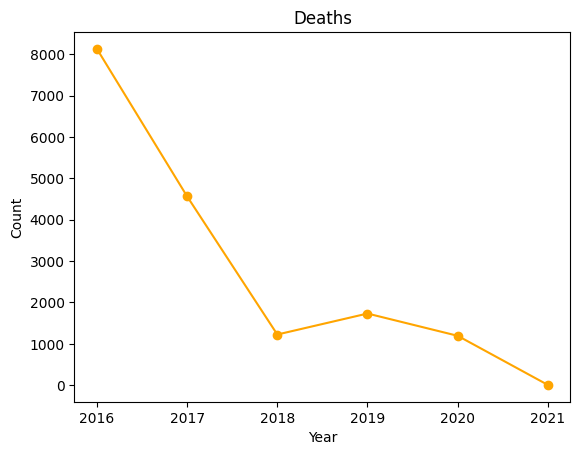

In [5]:
fig, ax = plt.subplots()

year = data.groupby(['Year']).sum().reset_index()

ax.plot(year['Year'], year['deaths'], label="deaths", c="orange", marker="o")
ax.set_title("Deaths")
ax.set_ylabel("Count")

plt.xlabel("Year")

plt.show()

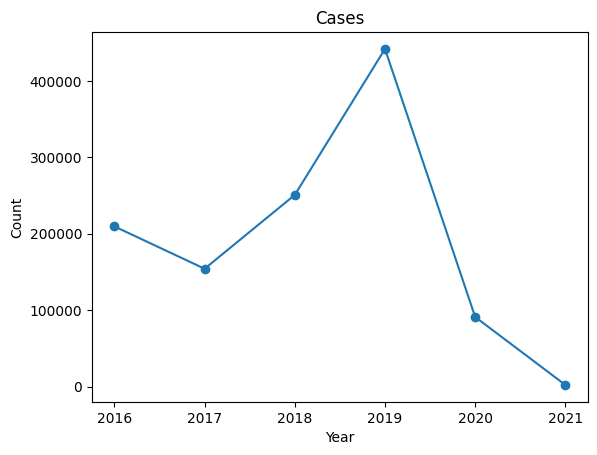

In [6]:
fig, ax = plt.subplots()

year = data.groupby(['Year']).sum().reset_index()

ax.plot(year['Year'], year['cases'], label="cases", marker="o")
ax.set_title("Cases")
ax.set_ylabel("Count")

plt.xlabel("Year")

plt.show()

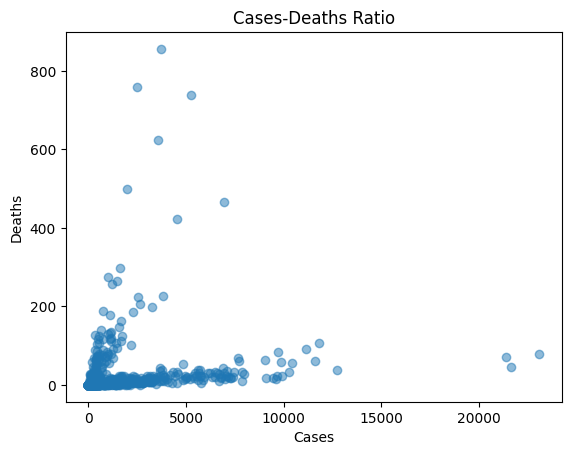

In [7]:
data_2016 = data

group = data_2016.groupby(['Region']).count().reset_index()

fig, ax = plt.subplots()

test = data_2016.groupby(['Region', 'loc', 'Year']).sum().reset_index()

ax.scatter(test['cases'], test['deaths'], alpha=0.5)

ax.set_xlabel("Cases")
ax.set_ylabel("Deaths")
plt.title("Cases-Deaths Ratio")

plt.show()

C:\Users\samur\AppData\Local\Temp\ipykernel_13220\1680983474.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_loc['loc'], rotation=45)


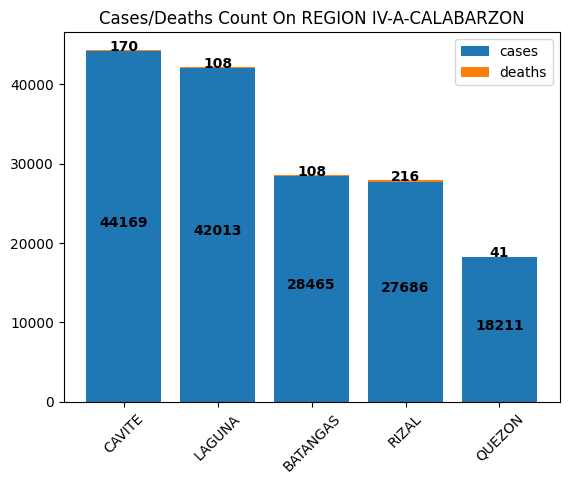

C:\Users\samur\AppData\Local\Temp\ipykernel_13220\1680983474.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_loc['loc'], rotation=45)


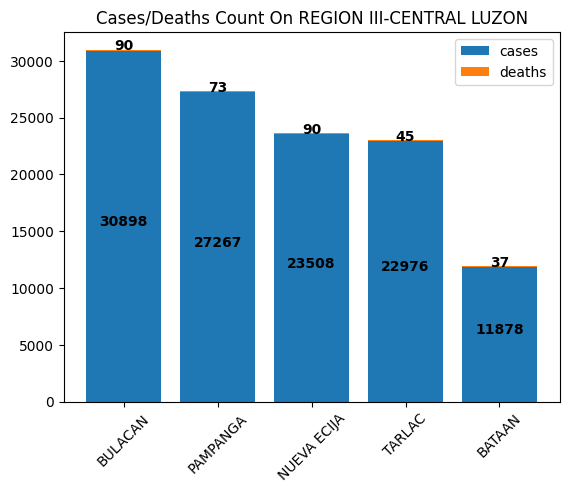

C:\Users\samur\AppData\Local\Temp\ipykernel_13220\1680983474.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_loc['loc'], rotation=45)


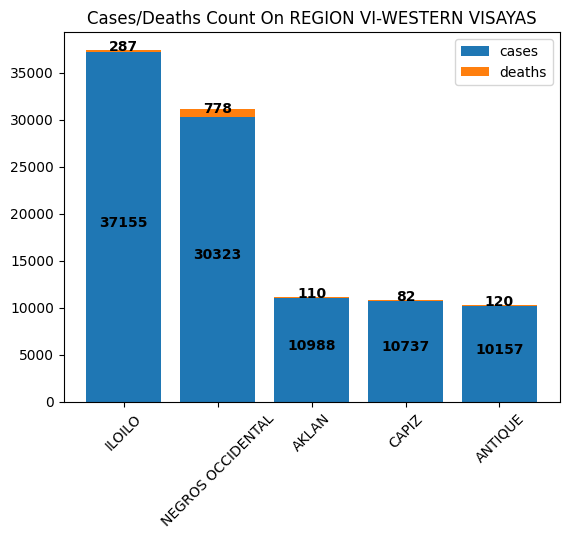

C:\Users\samur\AppData\Local\Temp\ipykernel_13220\1680983474.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_loc['loc'], rotation=45)


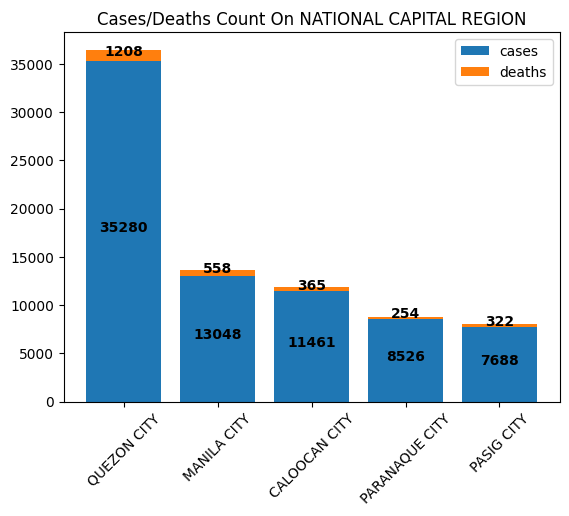

C:\Users\samur\AppData\Local\Temp\ipykernel_13220\1680983474.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data_loc['loc'], rotation=45)


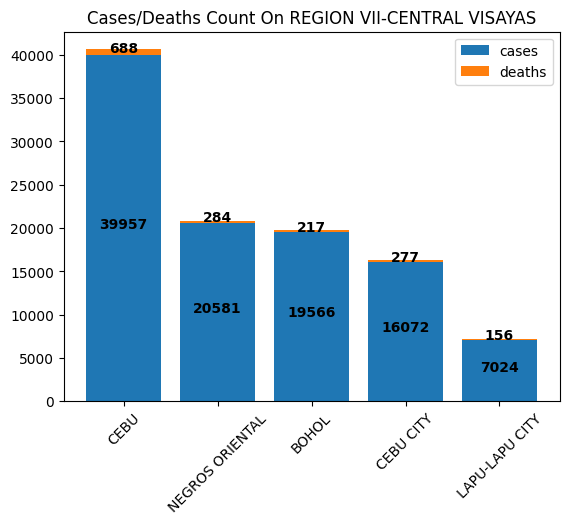

In [8]:
data_reg = data_2016.groupby(['Region']).sum().sort_values(by=["cases"], ascending=False).head(5).reset_index()

for i in range(len(data_reg)):
  data_loc = data_2016[data_2016['Region'] == data_reg['Region'][i]].groupby(['loc']).sum().sort_values(by=["cases"], ascending=False).head(5).reset_index()

  fig, ax = plt.subplots()

  ax.bar(data_loc['loc'], data_loc['cases'], label="cases")
  ax.bar(data_loc['loc'], data_loc['deaths'], label="deaths", bottom=data_loc['cases'])

  for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            round(bar.get_height()), ha='center',
            weight="bold", size=10)

  ax.set_title("Cases/Deaths Count On " + data_reg['Region'][i])
  ax.set_xticklabels(data_loc['loc'], rotation=45)

  ax.legend()

  plt.show()

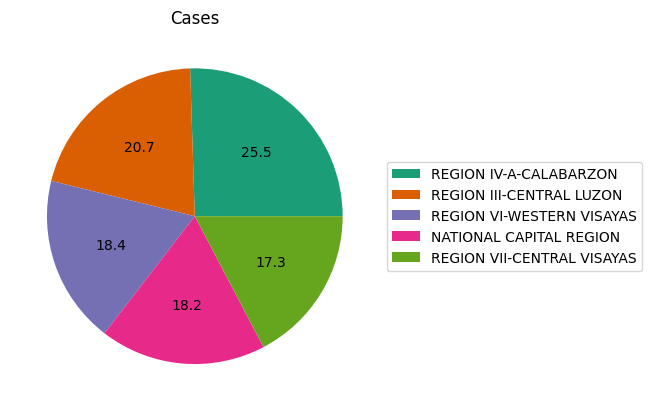

In [9]:
fig, ax = plt.subplots()
# ax.axis('on')
width = 0.3

# Outer
ax.pie(data_reg['cases'], radius=1, autopct='%1.1f', colors=plt.cm.Dark2.colors)
ax.set_title("Cases")
plt.legend(labels=data_reg['Region'], loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()



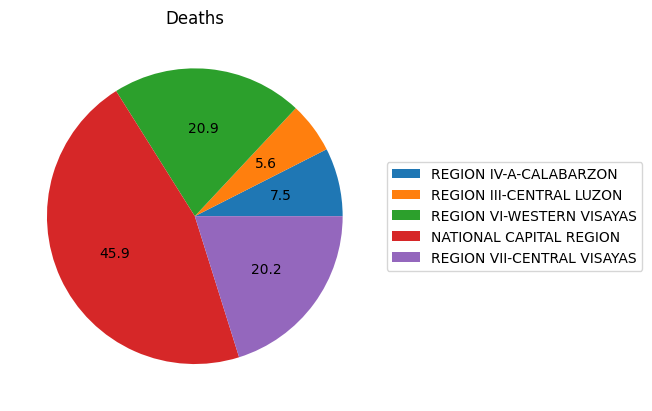

In [10]:
fig, ax = plt.subplots()
width = 0.3

# Inner
ax.pie(data_reg['deaths'], radius=1, autopct='%1.1f')
ax.set_title("Deaths")
plt.legend(labels=data_reg['Region'], loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

C:\Users\samur\AppData\Local\Temp\ipykernel_13220\1554612744.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["", "deaths", "cases"])
C:\Users\samur\AppData\Local\Temp\ipykernel_13220\1554612744.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["", "deaths", "cases"])


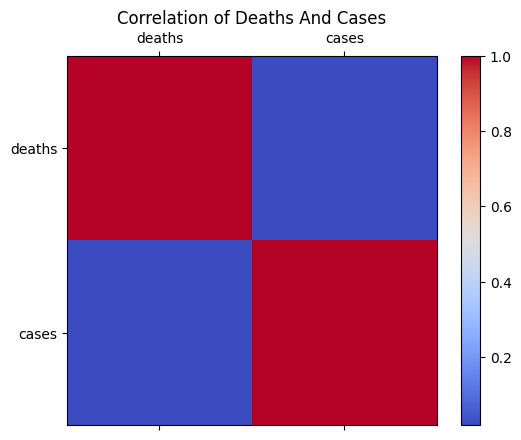

In [19]:
corr = data_2016.select_dtypes(int, float)

fig, ax = plt.subplots()

bar_container = ax.matshow(corr.corr(), cmap="coolwarm")

ax.set_xticklabels(["", "deaths", "cases"])
ax.set_yticklabels(["", "deaths", "cases"])
ax.set_title("Correlation of Deaths And Cases")

fig.colorbar(bar_container)
plt.show()